# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [2]:
# %pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_hh_income.head()
df_hh_income.shape
df_hh_income.columns
df_hh_income.isna().values.any()
df_hh_income.duplicated().values.any()

False

In [7]:
df_pct_poverty.head()
df_pct_poverty.shape
df_pct_poverty.columns
df_pct_poverty.isna().values.any()
df_pct_poverty.duplicated().values.any()

False

In [8]:
df_pct_completed_hs.head()
df_pct_completed_hs.shape
df_pct_completed_hs.columns
df_pct_completed_hs.isna().values.any()
df_pct_completed_hs.duplicated().values.any()

False

In [9]:
df_share_race_city
df_share_race_city.head()
df_share_race_city.shape
df_share_race_city.columns
df_share_race_city.isna().values.any()
df_share_race_city.duplicated().values.any()

False

In [10]:
df_fatalities
df_fatalities.head()
df_fatalities.shape
df_fatalities.columns
df_fatalities.isna().values.any()
df_fatalities.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [11]:
df_hh_income.dropna(inplace=True)

In [12]:
df_fatalities.drop(columns="id", inplace=True)

In [13]:
df_fatalities.dropna(inplace=True)

In [14]:
df_pct_poverty = df_pct_poverty[df_pct_poverty["poverty_rate"] != "-"]

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [15]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

In [16]:
poverty_grouped_by_state = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": sum})



<BarContainer object of 51 artists>

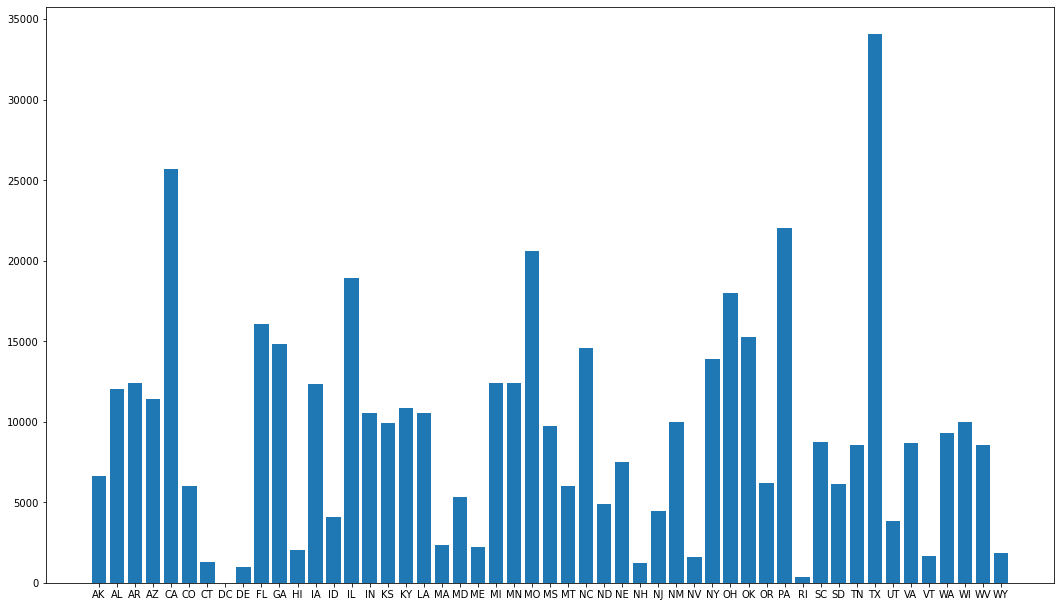

In [17]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(x = poverty_grouped_by_state.index,height= poverty_grouped_by_state["poverty_rate"])

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [18]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs != "-"]

In [19]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [20]:
pct_completed_hs_groupedby_area = df_pct_completed_hs.groupby("Geographic Area").sum().sort_values("percent_completed_hs")


<BarContainer object of 51 artists>

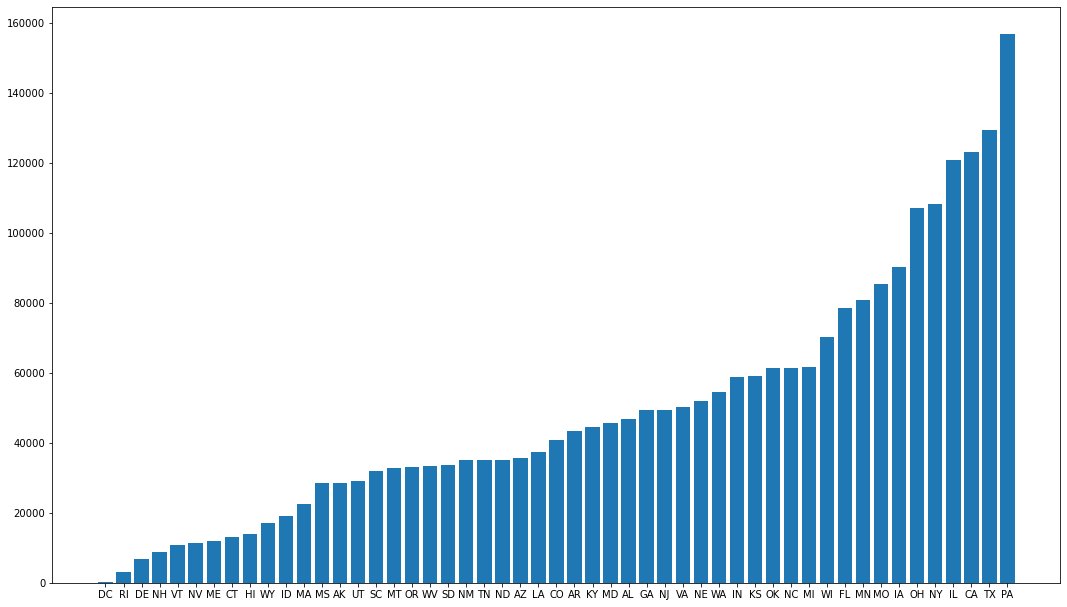

In [21]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(x = pct_completed_hs_groupedby_area.index,height= pct_completed_hs_groupedby_area["percent_completed_hs"])

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [22]:
merged_df_poverty_rates_and_high_school_graduation = poverty_grouped_by_state.merge(pct_completed_hs_groupedby_area, left_index=True, right_index=True)


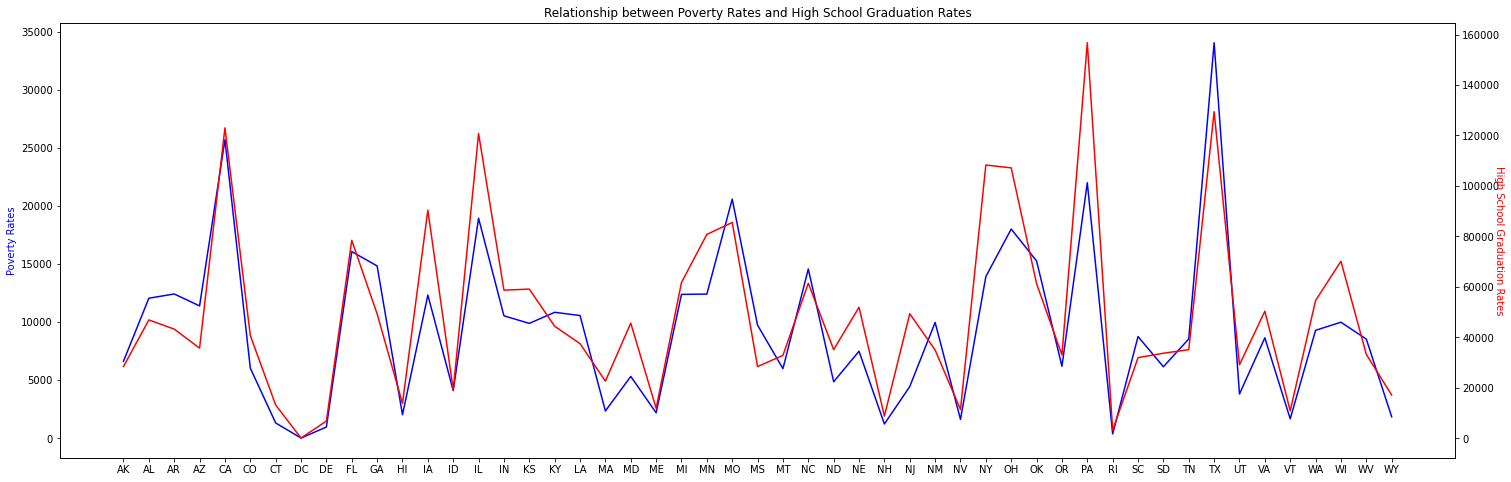

In [23]:
fig, ax1 = plt.subplots(figsize=(25,8))
plt.title("Relationship between Poverty Rates and High School Graduation Rates")

ax1.set_ylabel("Poverty Rates", color="blue")
ax1.plot(merged_df_poverty_rates_and_high_school_graduation.index, merged_df_poverty_rates_and_high_school_graduation["poverty_rate"], color="blue")


ax2 = ax1.twinx()
ax2.set_ylabel("High School Graduation Rates", rotation=270, color = "red")
ax2.plot(merged_df_poverty_rates_and_high_school_graduation.index, merged_df_poverty_rates_and_high_school_graduation["percent_completed_hs"], color = "red")
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [24]:
merged_df_poverty_rates_and_high_school_graduation.reset_index(inplace=True)

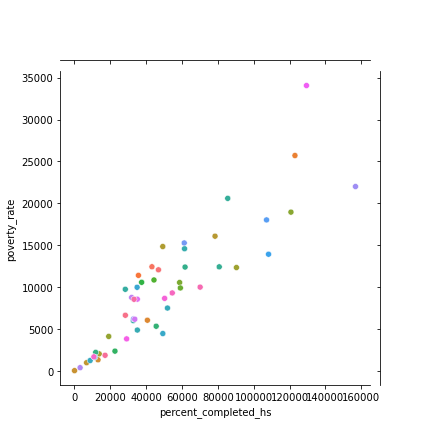

In [25]:
sns.jointplot(data=merged_df_poverty_rates_and_high_school_graduation, x="percent_completed_hs", y="poverty_rate", hue="Geographic Area", legend=False)


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

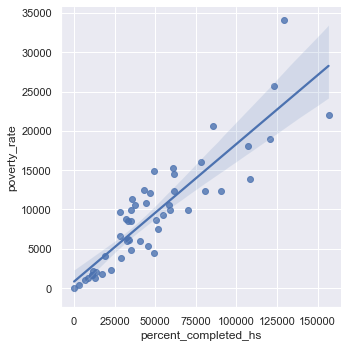

In [26]:
sns.set_theme(color_codes=True)
g = sns.lmplot(x="percent_completed_hs", y="poverty_rate", data=merged_df_poverty_rates_and_high_school_graduation)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [27]:
df_share_race_city.columns


Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [28]:
df_share_race_city = df_share_race_city[df_share_race_city.share_white != "(X)"]
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)

In [29]:
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])

In [30]:
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])

In [31]:
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"])

In [32]:
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"])

In [33]:
share_race_grouped = df_share_race_city.groupby("Geographic area").mean()


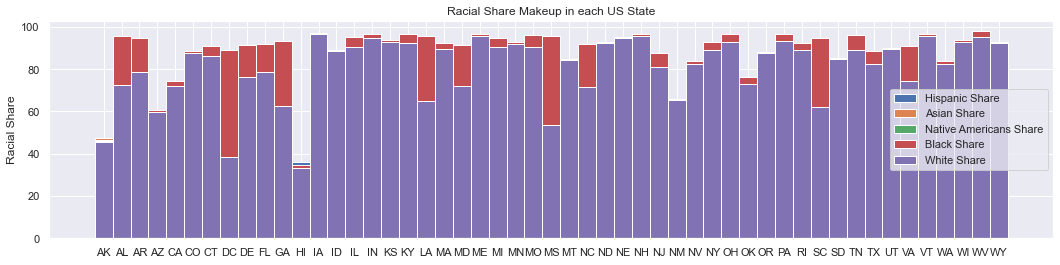

In [34]:
width = 1

fig, ax = plt.subplots(figsize=(18,4))

ax.bar(share_race_grouped.index, share_race_grouped.share_hispanic, width, label='Hispanic Share', bottom=share_race_grouped.share_asian)
ax.bar(share_race_grouped.index, share_race_grouped.share_asian, width, label='Asian Share', bottom=share_race_grouped.share_native_american)
ax.bar(share_race_grouped.index, share_race_grouped.share_native_american, width, label='Native Americans Share', bottom=share_race_grouped.share_black)
ax.bar(share_race_grouped.index, share_race_grouped.share_black, width, label='Black Share', bottom=share_race_grouped.share_white)
ax.bar(share_race_grouped.index, share_race_grouped.share_white, width, label='White Share')


ax.set_ylabel('Racial Share')
ax.set_title('Racial Share Makeup in each US State')
ax.legend()

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [35]:
people_killed_by_race = df_fatalities.groupby("race").count()

([<matplotlib.patches.Wedge at 0x7fc118f34100>,
 [Text(1.0986155778963667, 0.05517075315266609, 'A'),
  Text(0.6616018770379266, 0.8787963110413541, 'B'),
  Text(-0.7406653047177097, 0.8132741889347174, 'H'),
  Text(-1.0703362860485928, 0.2537326048573682, 'N'),
  Text(-1.0870970637480901, 0.1679880174008876, 'O'),
  Text(-0.06282533606495559, -1.0982044332219414, 'W')])

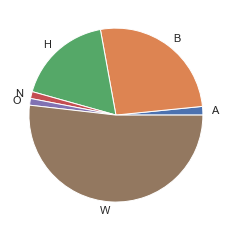

In [36]:
plt.pie(x=people_killed_by_race.name, labels=people_killed_by_race.index)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [37]:
fatalities_by_gender = df_fatalities.groupby("gender").count()
fatalities_by_gender

,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,
F,94,94,94,94,94,94,94,94,94,94,94,94
M,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


<BarContainer object of 2 artists>

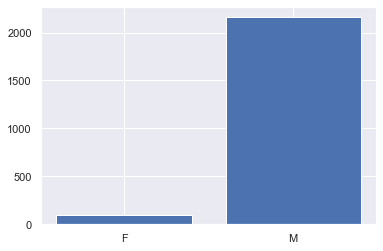

In [38]:
plt.bar(fatalities_by_gender.index, fatalities_by_gender.name)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [39]:
tr = df_fatalities.groupby(["gender","manner_of_death"]).count()

gender  manner_of_death 
F       shot                  89
        shot and Tasered       5
M       shot                2011
        shot and Tasered     149
Name: age, dtype: int64

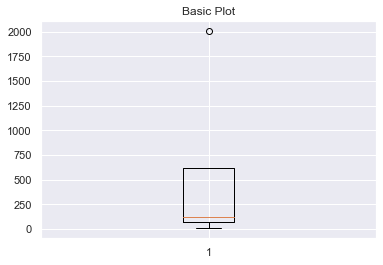

In [40]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(tr.age)
tr.age

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [41]:
df_fatalities_armed = df_fatalities[df_fatalities.armed != "unarmed"]

In [42]:
df_fatalities_armed.count()["name"]/df_fatalities.shape[0] * 100

92.67968056787933

<BarContainer object of 67 artists>

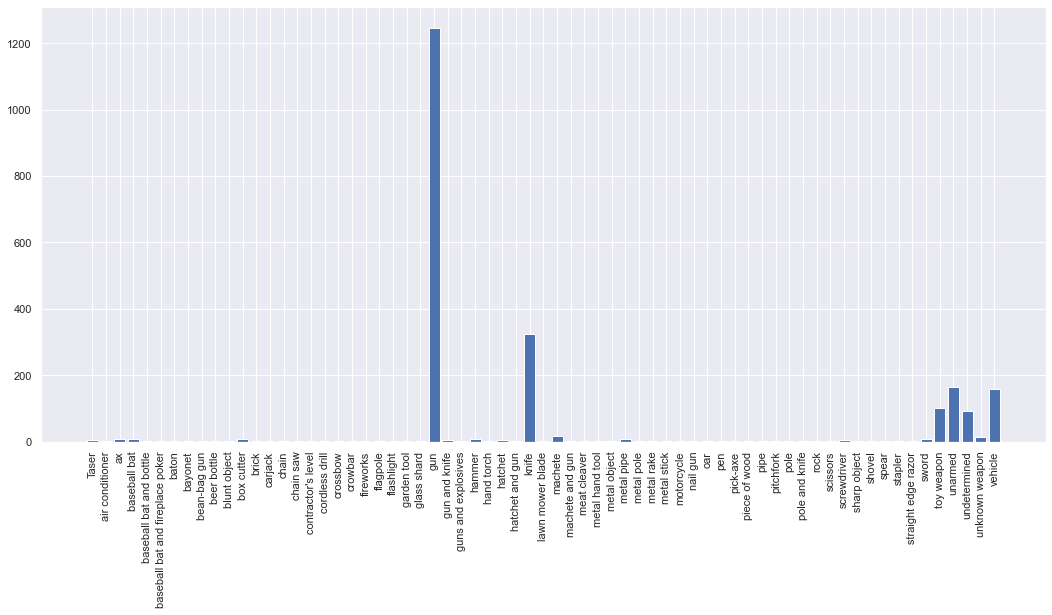

In [43]:
df_fatalities_grouped_by_armed = df_fatalities.groupby("armed").count()
df_fatalities_grouped_by_armed
fig = plt.figure(figsize=(18, 8))
plt.xticks(rotation="90")
plt.bar(df_fatalities_grouped_by_armed.index, df_fatalities_grouped_by_armed.name)


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [44]:
df_fatalities[df_fatalities.age >= 25].count()["name"]/df_fatalities.shape[0] * 100

81.27772848269743

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<BarContainer object of 72 artists>

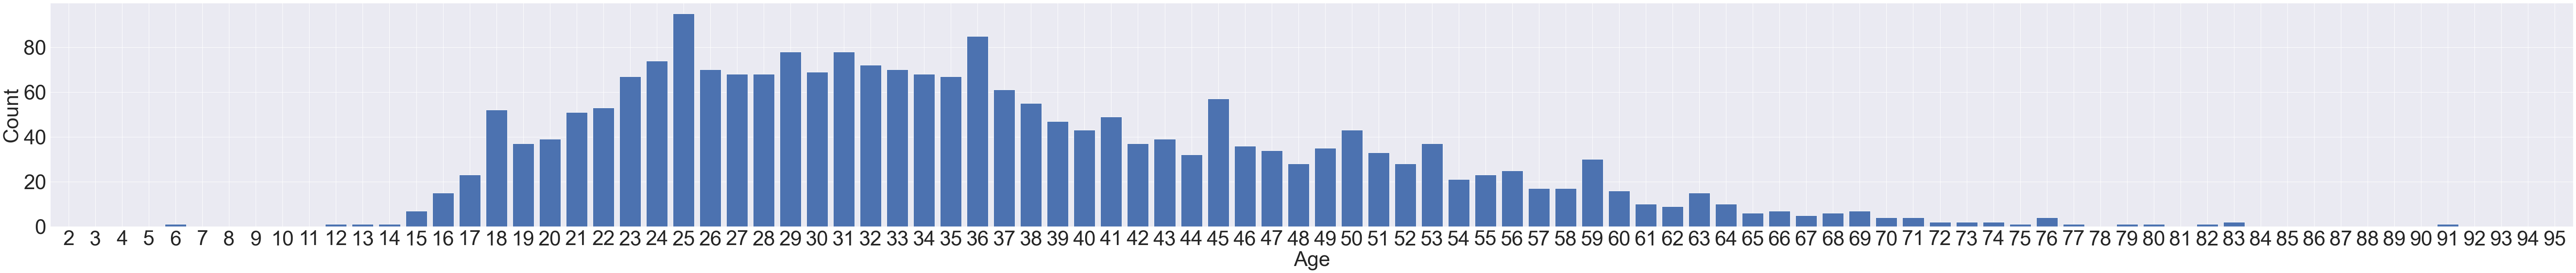

In [45]:
fatalities_by_age = df_fatalities.groupby('age').count().reset_index()
fig = plt.figure(figsize=(110,10))
plt.xticks(range(1,100), size=50)
plt.xlabel("Age",size=50)
plt.yticks(size=50)
plt.ylabel("Count",size=50)
plt.bar(fatalities_by_age.age, fatalities_by_age.name)

<AxesSubplot:xlabel='age', ylabel='Density'>

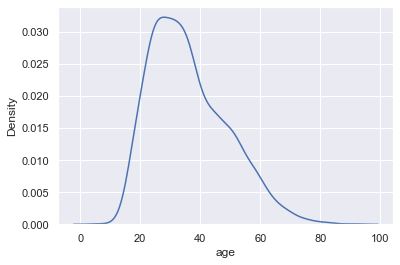

In [46]:
sns.kdeplot(data=df_fatalities, x="age")


Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [47]:
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

<AxesSubplot:xlabel='age', ylabel='Density'>

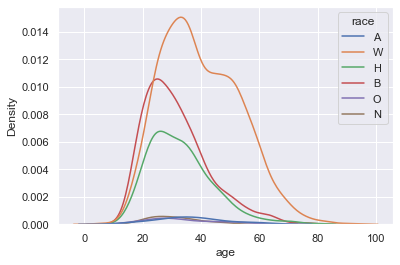

In [48]:
sns.kdeplot(data=df_fatalities, x="age", hue="race")

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [49]:
df_fatalities_by_race = df_fatalities.groupby("race").count()

<BarContainer object of 6 artists>

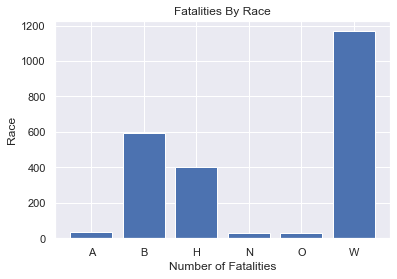

In [50]:
plt.title("Fatalities By Race")
plt.xlabel("Number of Fatalities")
plt.ylabel("Race")
plt.bar(df_fatalities_by_race.index, df_fatalities_by_race.name)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [51]:
df_fatalities[df_fatalities.signs_of_mental_illness == True].count()["name"]/df_fatalities.shape[0] * 100

25.42147293700089

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [52]:
most_dangerous_cities = df_fatalities.groupby('city').count().sort_values("name", ascending=False)[:10]

<BarContainer object of 10 artists>

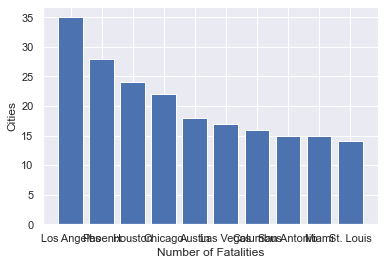

In [53]:
plt.xlabel("Number of Fatalities")
plt.ylabel("Cities")
plt.bar(most_dangerous_cities.index, most_dangerous_cities.name)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [54]:
fatalities_in_most_dangerous_cities = df_fatalities[df_fatalities.city.isin(most_dangerous_cities.index)]
fatalities_in_most_dangerous_cities_by_race = fatalities_in_most_dangerous_cities.groupby("race").count()["name"]
race_share_for_fatalities_in_most_dangerous_cities = fatalities_in_most_dangerous_cities_by_race / fatalities_in_most_dangerous_cities.shape[0] * 100
race_share_for_fatalities_in_most_dangerous_cities

race
A    0.98
B   39.22
H   28.92
N    1.96
O    0.49
W   28.43
Name: name, dtype: float64

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [55]:
df_fatalities_by_state = df_fatalities.groupby("state").count().sort_values("name", ascending=False)[:10].sort_index().index
df_fatalities_by_state


Index(['AZ', 'CA', 'CO', 'FL', 'GA', 'MO', 'NC', 'OH', 'OK', 'TX'], dtype='object', name='state')

In [56]:
df_pct_poverty.head()
states_with_highest_poverty_rates = df_pct_poverty.groupby("Geographic Area").agg({ "poverty_rate": sum}).sort_values("poverty_rate", ascending=False)[:10].sort_index().index


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [57]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

<AxesSubplot:xlabel='date,date'>

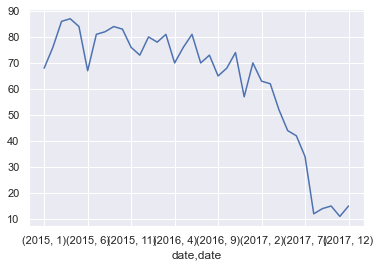

In [58]:
fatalities_over_time = df_fatalities
fatalities_over_time.index = df_fatalities.date
fatalities_over_time = fatalities_over_time.groupby(by=[fatalities_over_time.index.year, fatalities_over_time.index.month]).count()
fatalities_over_time.name.plot()
# fatalities_over_time[:-1].plot()

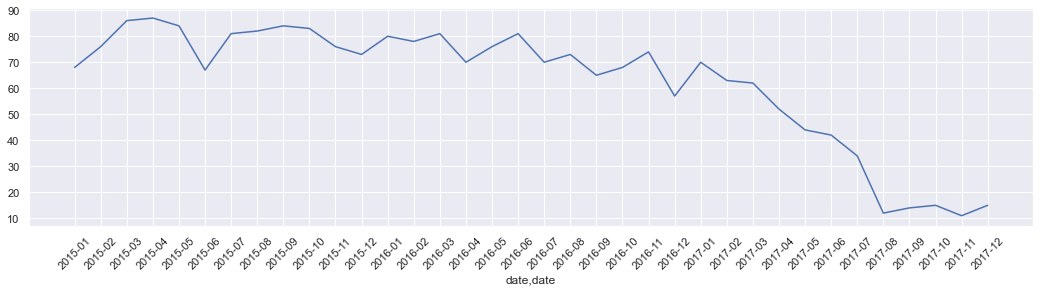

In [59]:
ax = fatalities_over_time.name.plot()
ax.figure.set_size_inches(18, 4)
ax.set_xticks(range(len(fatalities_over_time)))
ax.set_xticklabels(["%s-%02d" % item for item in fatalities_over_time.index.tolist()],
rotation=45, ha='center')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).